In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error

In [115]:
df = pd.read_csv('weight-height.csv')

ohe = OneHotEncoder()
arr = ohe.fit_transform(df.Gender.values.reshape(-1, 1))
df_encoded = pd.DataFrame(data = arr.toarray(), columns = ohe.categories_[0].tolist())
df_encoded[['Height', 'Weight']] = df.iloc[:, 1:3]
df_encoded.head()

,Female,Male,Height,Weight
0,0.0,1.0,73.847017,241.893563
1,0.0,1.0,68.781904,162.310473
2,0.0,1.0,74.110105,212.740856
3,0.0,1.0,71.730978,220.042470
4,0.0,1.0,69.881796,206.349801


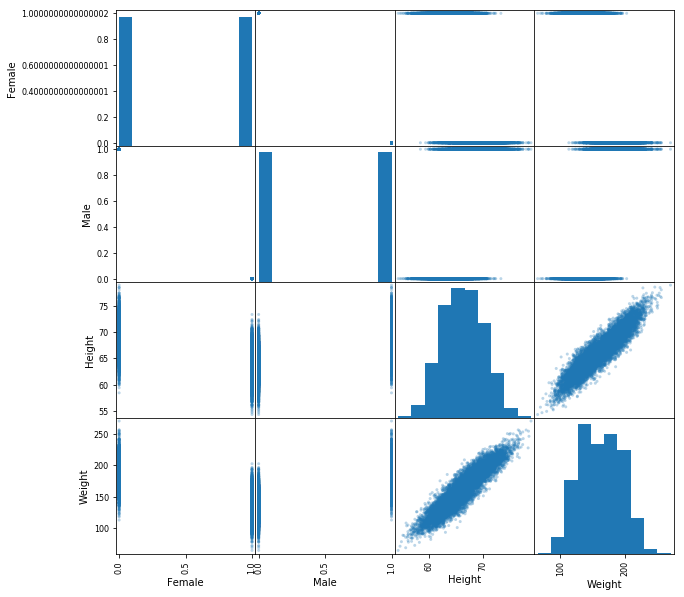

In [122]:
pd.plotting.scatter_matrix(df_encoded, alpha = 0.3, figsize=(10, 10))
plt.show()

In [123]:
df_encoded_train, df_encoded_test = train_test_split(df_encoded, test_size = 0.2, random_state = 0)

In [124]:
lr = LinearRegression()
lr.fit(df_encoded_train.drop(columns = 'Weight'), df_encoded_train.Weight)
lr.coef_

array([-9.71190845,  9.71190845,  5.96260976])

In [131]:
y_pred = lr.predict(df_encoded_test.drop(columns = 'Weight'))

score = r2_score(df_encoded_test.Weight, y_pred)
print('R2 score of this model is ', score)

R2 score of this model is  0.9052889824534557


In [132]:
mae = mean_absolute_error(df_encoded_test.Weight, y_pred)
print('Mean Absolte Error of this model is ', mae)

Mean Absolte Error of this model is  7.955916525326745


In [66]:
lr3 = LinearRegression()
lr3.fit(df1_train.Height.values.reshape(-1, 1), df1_train.Weight)
y_pred = lr3.predict(df1_test.Height.values.reshape(-1, 1))

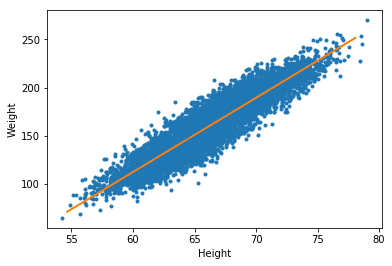

In [67]:
plt.plot(df1_train.Height, df1_train.Weight, '.',
        df1_test.Height, y_pred, '-')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [68]:
r2score = r2_score(df1_test.Weight, y_pred)
r2score

0.8581952493935256

(array([  20.,  172.,  747., 1496., 1777., 1732., 1290.,  613.,  135.,
          18.]),
 array([54.26313333, 56.73669423, 59.21025513, 61.68381603, 64.15737693,
        66.63093784, 69.10449874, 71.57805964, 74.05162054, 76.52518144,
        78.99874235]),
 <a list of 10 Patch objects>)

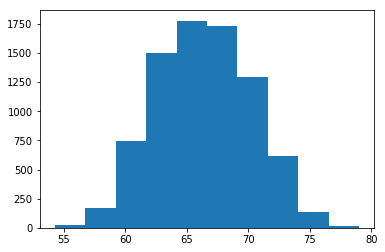

In [69]:
plt.hist(df1_train.Height)

In [70]:
lr4 = LinearRegression()

X_train = df1_train.drop(columns = 'Weight', axis = 1)
X_test = df1_test.drop(columns = 'Weight', axis = 1)

lr4.fit(X_train, df1_train.Weight)
lr4.coef_

array([19.42381689,  5.96260976])

In [71]:
y_pred_1 = lr4.predict(X_test)
r2score_1 = r2_score(df1_test.Weight, y_pred_1)
r2score_1

0.9052889824534558

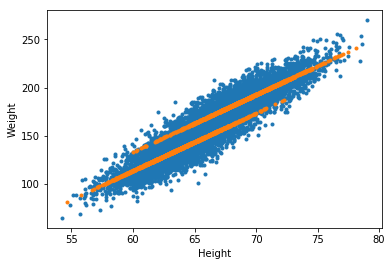

In [72]:
plt.plot(df1_train.Height, df1_train.Weight, '.',
        df1_test.Height, y_pred_1, '.')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

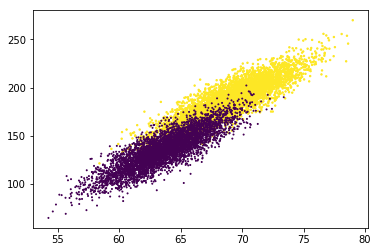

In [76]:
plt.scatter(df1.Height, df1.Weight, s = df1.Gender, c = df1.Gender)
plt.show()